In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import dtsettings

In [30]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 数据清洗

In [31]:
titanic.isnull().sum()

Unnamed: 0      0
Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
dtype: int64

In [32]:
dtsettings.Chinese()

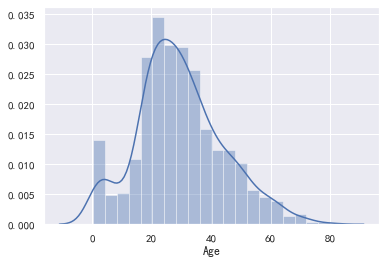

In [33]:
sns.distplot(titanic[titanic['Age'].notnull()]['Age'])

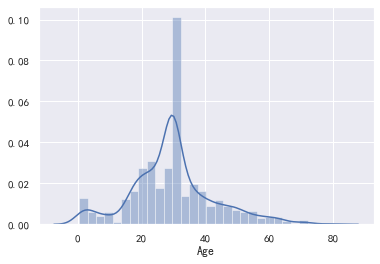

In [34]:
#发现年龄呈正态分布，用年龄的均值进行缺失值的填充。
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
sns.distplot(titanic['Age'])

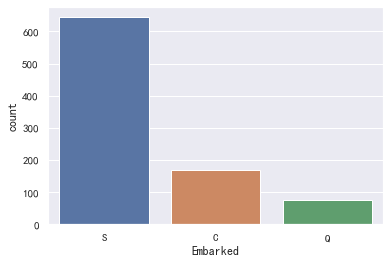

In [35]:
sns.countplot(x='Embarked',data=titanic)

In [36]:
#再利用正确的登船地点S进行缺失值的填充
titanic['Embarked']=titanic['Embarked'].fillna('S')
titanic.isnull().sum()

Unnamed: 0      0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
dtype: int64

In [37]:
#对于Cabin字段，由于缺失值太多，将其删除，并删除其他多余字段
titanic.drop(['Survived','SibSp','Parch','Name','Cabin','Ticket'],axis=1)

,Unnamed: 0,Pclass,Sex,Age,Fare,Embarked
0,1,3,male,22.000000,7.2500,S
1,2,1,female,38.000000,71.2833,C
2,3,3,female,26.000000,7.9250,S
3,4,1,female,35.000000,53.1000,S
4,5,3,male,35.000000,8.0500,S
...,...,...,...,...,...,...
886,887,2,male,27.000000,13.0000,S
887,888,1,female,19.000000,30.0000,S
888,889,3,female,29.699118,23.4500,S
889,890,1,male,26.000000,30.0000,C


2.数据探索

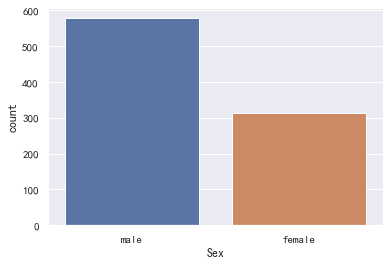

In [38]:
sns.countplot(x='Sex',data=titanic)

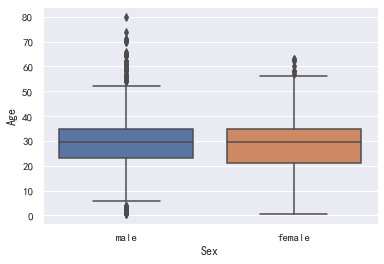

In [39]:
sns.boxplot(x='Sex',y='Age',data=titanic)

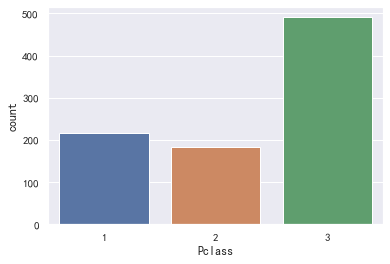

In [40]:
sns.countplot(x='Pclass',data=titanic)

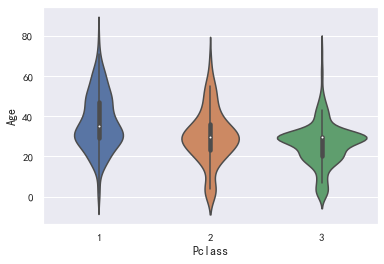

In [41]:
sns.violinplot(x='Pclass',y='Age',data=titanic)

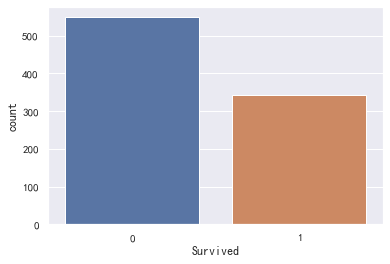

In [42]:
sns.countplot(x='Survived',data=titanic)

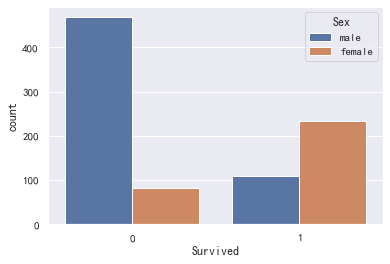

In [43]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

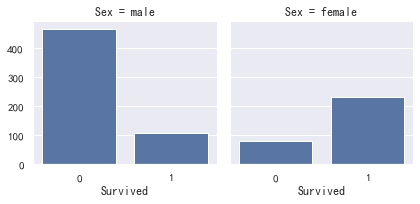

In [44]:
g=sns.FacetGrid(titanic,col='Sex')
g.map(sns.countplot,'Survived')

In [45]:
def agelevel(age):
    if age<=16:
        return 'child'
    elif age>=60:
        return 'aged'
    else:
        return 'midlife'
titanic['age_level']=titanic['Age'].map(agelevel)

In [46]:
titanic.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,midlife
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,midlife
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,midlife
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,midlife
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,midlife


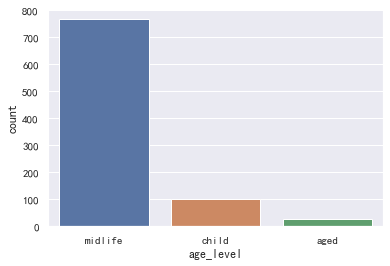

In [47]:
sns.countplot(x='age_level',data=titanic)

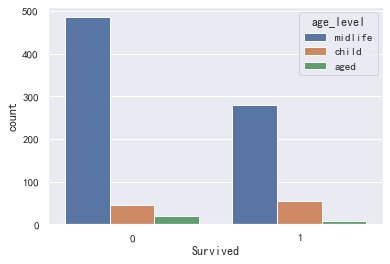

In [48]:
sns.countplot(x='Survived',hue='age_level',data=titanic)

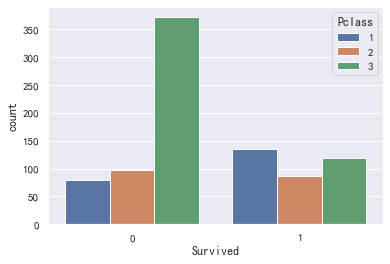

In [49]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)